In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_data.csv')



In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [10]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()
mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [11]:
X_train.sample(5)


,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
252,62.0,26.55,0,62.0,62.0,26.5500,26.550000
210,24.0,7.05,0,24.0,24.0,7.0500,7.050000
403,28.0,15.85,1,28.0,28.0,15.8500,15.850000
336,29.0,NaN,1,29.0,29.0,14.4583,32.617597
841,16.0,10.50,0,16.0,16.0,10.5000,10.500000


In [12]:
X_train['Age'].var()

204.3495133904614

In [14]:
X_train['Age_median'].var()

161.9895663346054

In [15]:
 X_train['Age_mean'].var()

161.81262452718673

In [17]:
print(X_train['Fare'].var())
print(X_train['Fare_median'].var())
print(X_train['Fare_mean'].var())

2448.197913706318
2340.0910219753637
2324.2385256705547


<AxesSubplot:ylabel='Density'>

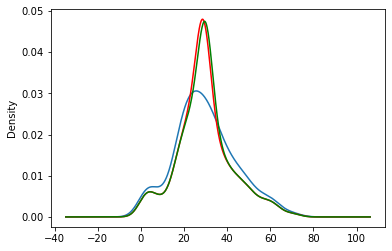

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')


<AxesSubplot:ylabel='Density'>

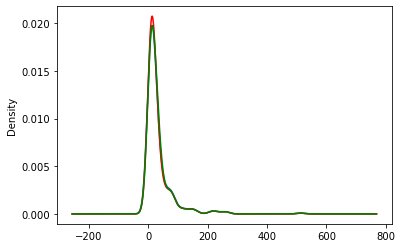

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Fare'].plot(kind='kde', ax=ax)
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

In [20]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')
trf.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [23]:
print(trf.named_transformers_['imputer1'].statistics_)
print(trf.named_transformers_['imputer2'].statistics_)



[28.75]
[32.61759689]
